# Decision trees

About linear models so far,  
Pros:  
1. fast training
2. simple regularization

Cons:
1. Hard to deal with non-linear function dependences. Need of feature engineering and heruistics
2. Scale sensitive
3. Need of one-hot encoding of categorial features


Decision trees,  
Pros:  
1. Can approximate non-linear functions of any kind
2. Easy interpretable
3. Scale insensitive
4. missing values
5. can process categorial features 

Cons:
1. Subject to severe overfitting
2. unstable - small variations in data produce different trees
3. learning an optimal decision tree is NP-hard. All algorithms are greedy. 
4. Not efficient in high dimensions. Number of samples required to populate the tree doubles for each additional level the tree grows to.


### Reading

1. Bishop. Pattern recognition and machine learning. 14.4   
2. Flatch. Machine learning..., 5.*  
3. Hastie. Elements of statistical leanring, 9.2.*   


### Defenitions
Splitting criteria on vertex v:  
1-dim:    $\beta_v(x; j, t) = [x_j < t]$  
linear:   $\beta_v(x; w, t) = [<w, x> < t]$  
metric:   $\beta_v(x; w, t) = [p(x, x_v) < t]$  

! easy to show that we can build decision tree with zero training error  

Objective function on every splitting:  
$Q(R_m, j, s) = H(R_m) - \frac{|R_l|)}{|R_m|}H(R_l) - \frac{|R_r|)}{|R_m|}H(R_r)$  

$Q(R_m, j, s) \rightarrow max$

where H(R) - impurity criterion  
$H(R) = min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} L(y_i, c)$  
$H(R) \rightarrow min$

where L(y_i, c) - loss function

## Regression   
### MSE regression
$H(R) = min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$

We now that for MSE task optimal value of c is  
$c_{*} = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$  

$H(R) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c_{*})^2 = D[y_i]$

### MAE regression

$c_{*} = median\{y_i\}$


## Classification

$p_k = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} [y_i == k]$

$k_* = arg max_k p_k$

### Classification error

$H(R) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} [y_i \neq k_*] = 1 - p_{k_*}$


### Ginni criterion

$H(R) = \sum_{k=1}^K p_k (1 - p_k)$


### Entropy criterion

$H(R) =  - \sum_{k=1}^K p_k log p_k $


### Stopping criterion

1. max tree depth  
2. max number of objects in the leaf   
3. max number of leaves  
4. $Q^{(k+1)} - Q^{(k)} > threshold $  
5. all objects in leaves have same class


### Prunning



### Popular algorithms

1. ID3   
    + entropy criterion  
    + 4th and 5th stopping criteria  
2. C4.5  
    + 2nd stopping criterion  
    + modified entropy criterion  
3. CART  
    + ginni criterion
    
    
### Connection with linear models

$a(x) = \sum_{j=1}^n w_j [x \in J_j]$


### Complexity

n - number of samples
d - number of features
t - number of trees

$O(log d)$ complexity of predicting a class label

$O(n*d*logd)$ complexity of traing a tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets


data = datasets.load_wine()

df = pd.DataFrame(data['data'], columns = data.feature_names)
y = np.array(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
model = DecisionTreeClassifier()
model.fit(df, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

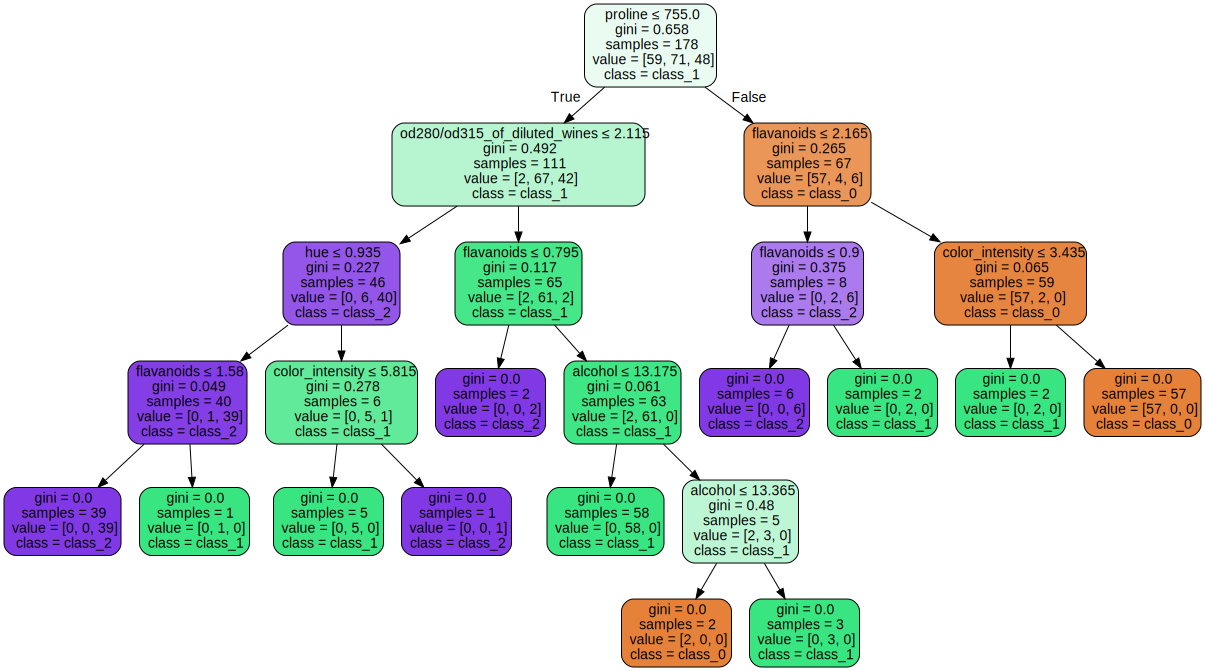

In [4]:
import graphviz 


dot_data = export_graphviz(model, out_file=None, 
                         feature_names=data.feature_names,  
                         class_names=data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

![image](https://docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-choice/image5.png)

## Bagging (bootstrap aggregation)

1. Bootstrap  
 + averaging over predictions of N base models on subsets from dataset with repetitions
 + which gives 1/N factor in dispersion
 + assumption that models are not correlated
 
Random forest is a bagging of decision trees  
 + subsampling over features
 
 
 
### Out-of-bag score

every decision tree in the forest is trained on bootstrapped subset, so objects not included in train subset can be considered as control set

$OOB = \sum_{i=1}^ L(y_i, \frac{1}{\sum_{n=1}^N [x_i \notin X_n]} \sum_{n=1}^N [x_i \notin X_n] b_n(x_i)) $

L - loss function


### Complexity

n - number of samples
m - number of trees

$O(m * n * log(n))$ - memory size of trained model 


### feature importance

Earlier features used for splitting are more important.  
For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.

In [5]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=10, random_state=1337, oob_score=True)
model.fit(df, y)
model.oob_score_

/opt/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9606741573033708

In [6]:
model.feature_importances_

array([ 0.09838885,  0.01680485,  0.00127441,  0.00933723,  0.02936158,
        0.0628973 ,  0.18961217,  0.00612884,  0.02929391,  0.1252294 ,
        0.05507188,  0.09839906,  0.27820052])

# Feature selection

1. statistical tests, e.g. chi2  
$X^2 = \sum_{i=1}^k \frac{(x_i - m_i)^2} {m_i}$  
2. recursive feature addition / elimination  
3. linear models with L1 regularizer
4. tree models